# Исследование объявлений о продаже квартир

Используя архив объявлений о продаже квартир Яндекс.Недвижимость в Санкт-Петербурге и соседних населенных пунктах. Выделить факторы влияющие на стоимость и продажи квартир.

#### Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении


### Шаг 1. Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
realty[['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area']].describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000


- Площадь в  900 квадратных метров, проверю.
- Высота потолков в 1 и 100 метров, нужно проверить.
- Зданий с высотой 60 этажей нет в СПБ.

In [4]:
realty.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
realty.duplicated().sum()

0

### Вывод

В таблице данные по 23699 объявлениям. Наблюдается множество пропусков, в таких колонках как: апартаметы, ближайшие аэропорт и ближайшие парки, больше половины данных отсутствует.

### Шаг 2. Предобработка данных

In [6]:
realty['last_price'] = realty['last_price'].astype('int')
realty['total_area'] = realty['total_area'].astype('int')
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format = '%Y-%m-%d')

Меняю тип данных у цены и общей площади, большая точность нам не нужна, а целые числа читать легче.

In [7]:
realty['balcony'] = realty['balcony'].fillna(0).astype('int')

Предполагаю что если человек не обозначил число балконов то их просто нет, меняю пропуски на 0 и меняю тип данных.

In [8]:
realty['is_apartment'] = realty['is_apartment'].fillna(False).astype('bool')

Предполагаю что люди не указывали апартаменты, или нет, исходя из того что у них не апартамены, и поэтому указывать не нужно. Заменяю пропуски на False, и меняю тип данных.

In [10]:
realty = realty.query('ceiling_height != [1.2, 1.75, 1, 100]')


Убрали аномалии.


In [11]:
realty['ceiling_height'] = realty['ceiling_height'].fillna(realty['ceiling_height'].median())

Заполнил пропуски в высоте потолков медианными значениями. Предполагаю что в пропусках нет выдающихся значений и поэтом люди не уточняли при заполнении формы.

In [12]:
realty['kitchen_area'] = realty['kitchen_area'].fillna(realty['kitchen_area'].median()).astype(int)

Заполнил пропуски в площади кухни медианными значениями, поменял тип данных.

In [13]:
realty.dropna(subset=['floors_total'], inplace = True)
realty.dropna(subset=['locality_name'], inplace = True)

Удалил строки с пропусками в колонках “всего этажей” и с названием населенного пункта. Потерял 134 строки несущественно для выборки. Предполагаю что пропуски возникли в результате не внимательности при заполнении.

In [14]:
realty['living_area'].corr(realty['rooms'])

0.8461069248002078

Есть корреляция между числом комнат и жилой площадью.

In [15]:
rooms_pivot = realty.pivot_table(index='rooms', values='living_area', aggfunc=['median'])
rooms_pivot.columns = ['median']
rooms_pivot

,median
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.650
5,91.785
6,124.400
7,145.000
8,161.000


Создал сводную таблицу с медианными значениями жилой площади в зависимости от числа комнат.

In [16]:
def living_area(data, rooms_pivot):
    for k, v in rooms_pivot['median'].items(): 
        data.loc[(data.loc[:, 'rooms']== k) &(data.loc[:, 'living_area'].isnull()), 'living_area' ] = v
living_area(realty, rooms_pivot)        
realty['living_area'] = realty['living_area'].astype(int)

Заменяю пропуски в колонке с жилой площадью на значения из ранее созданной таблицы. Предполагаю что клиенты не стали уточнять эту информацию

In [17]:
realty['locality_name'] = realty['locality_name'].replace('посёлок', 'поселок', regex=True)
realty['locality_name'].unique()                                                                              

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

В колонке с названием населенных пунктов, есть двоякое написание "поселка" через "е" и через "ё", исправил.

In [18]:
realty['floors_total'] = realty['floors_total'].astype(int)

In [19]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23561 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23561 non-null int64
last_price              23561 non-null int64
total_area              23561 non-null int64
first_day_exposition    23561 non-null datetime64[ns]
rooms                   23561 non-null int64
ceiling_height          23561 non-null float64
floors_total            23561 non-null int64
living_area             23561 non-null int64
floor                   23561 non-null int64
is_apartment            23561 non-null bool
studio                  23561 non-null bool
open_plan               23561 non-null bool
kitchen_area            23561 non-null int64
balcony                 23561 non-null int64
locality_name           23561 non-null object
airports_nearest        18038 non-null float64
cityCenters_nearest     18061 non-null float64
parks_around3000        18062 non-null float64
parks_nearest           8028 non-null float64
ponds_around3000    

airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition Пропуски в этих колонках оставляю, нет подходящих значений или корреляций для заполнения.

days_exposition пропуски возникли возможно в связи с тем что объявления все еще размещены.

### Шаг 3. Посчитаем и добавим в таблицу, новые признаки

In [20]:
realty['price_per_meter'] = (realty['last_price'] / realty['total_area']).astype(int)

Добавил цену за квадратный метр.

In [21]:
realty['weekday'] = realty['first_day_exposition'].dt.weekday
realty['month'] = realty['first_day_exposition'].dt.month
realty['year'] = realty['first_day_exposition'].dt.year

Добавил колонки с днем недели, месяцем и годом размещения объявления.

In [22]:
realty['living_area_and_total'] = realty['living_area'] / realty['total_area']
realty['kitchen_area_and_total'] = realty['kitchen_area'] / realty['total_area']

Добавил колонки отношения жилой площади к общей, и кухни к общей.

In [23]:
def floor_type(df):
    floor = df['floor']
    total_floors = df['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    elif 1 < floor < total_floors:
        return 'другой'

realty['floor_type'] = realty.apply(floor_type, axis = 1)

Сгруппировал этажи и добавил колонку, где указано на каком этаже расположена квартира относительно всего здания.

### Шаг 4. Проведем исследовательский анализ данных:

count    23561.000000
mean        60.098553
std         35.670603
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

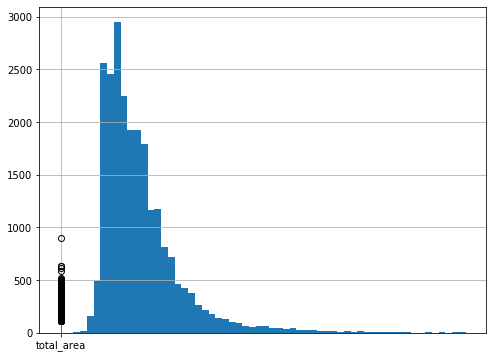

In [24]:
realty['total_area'].hist(bins=60, range=(0, 300), figsize=(8, 6))
realty.boxplot('total_area')
realty['total_area'].describe()

Распределение больше похоже на Пуассона чем на Гаусса, совсем маленьких квартирок почти нет. Есть выбросы свыше 550, возможно значения и правдивые, но не отображают положение рынка, и вносят сильные помехи.

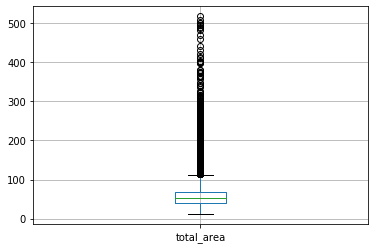

In [25]:
good_realty = realty.query('total_area < 550')
good_realty.boxplot('total_area')

Отчистил от сильных выбровсов, создал новый data frame

count    2.355600e+04
mean     6.496216e+06
std      1.032069e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.642000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

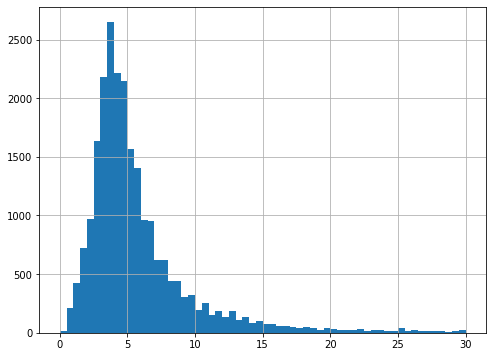

In [26]:
(good_realty['last_price'] / 1000000).hist(bins=60, range=(0, 30), figsize=(8, 6))
good_realty['last_price'].describe()

Распределение Гаусса с большим хвостом в большую сторону. В основном стоимость квартир колеблится в районе 4 миллионов.

count    23556.000000
mean         2.069154
std          1.072066
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

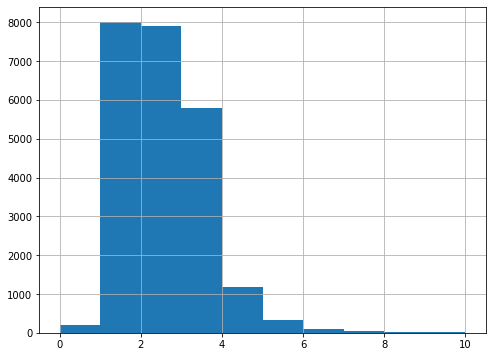

In [27]:
good_realty['rooms'].hist(bins=10, range=(0, 10), figsize=(8, 6))
good_realty['rooms'].describe()

В основном продают 1 и 2 комнатные квартиры.

count    23556.000000
mean         2.720468
std          0.761841
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

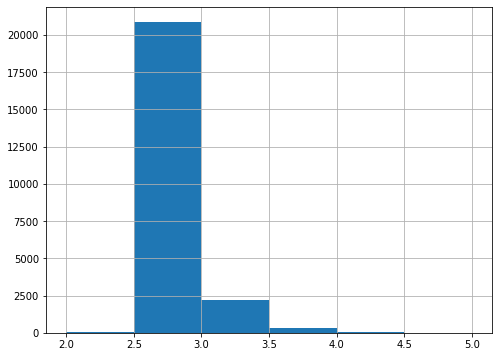

In [28]:
good_realty['ceiling_height'].hist(bins=6, range=(2, 5), figsize=(8, 6))
good_realty['ceiling_height'].describe()

У большенства квартир потолки высотой в районе 2.65 метров. Есть и намного больше.

(1, 1600)

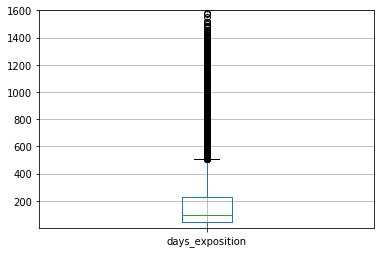

In [29]:
good_realty.boxplot('days_exposition')
plt.ylim(1,1600)

In [30]:
good_realty['days_exposition'].describe()

count    20387.000000
mean       180.774906
std        219.758324
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

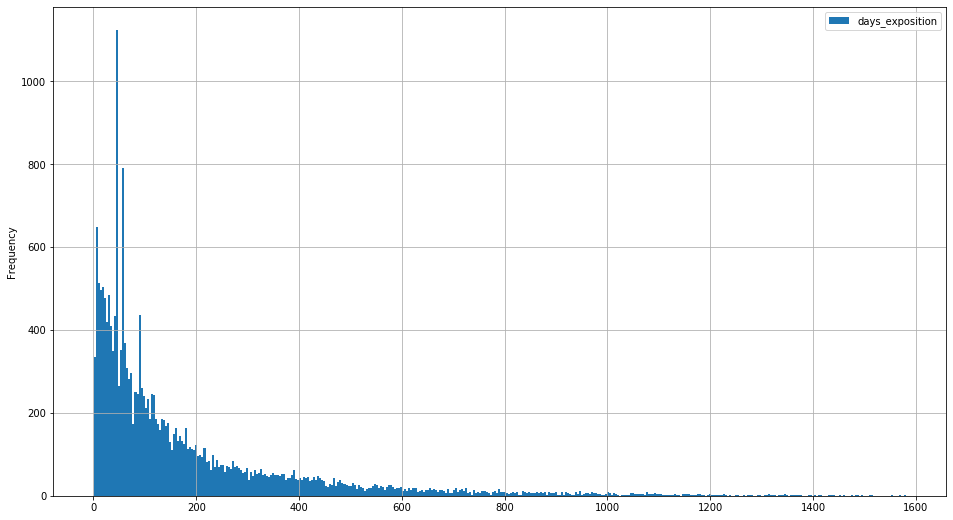

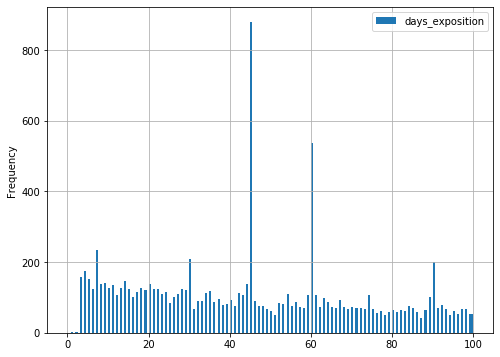

In [31]:
good_realty.plot(y='days_exposition', kind='hist', bins=400, grid=True, figsize=(16, 9))
good_realty.plot(y='days_exposition', kind='hist', bins=200, grid=True, range=(0, 100), figsize=(8, 6))

Половину квартир продают за 3 месяца, четверть продаж за полтора месяца. У нас длинный хвост на диаграмме, поэтому среднее значение в полгода скорее можно считать долгими продажами.

Есть выбровы на 7, 30, 60, 45 и 90 дней. Не вижу закономерности, нужно поинтересоваться у тех кто собирал данные. А пока буду удалять.

In [32]:
good_realty = good_realty.query('days_exposition not in (7,30,60,45.00000000000001, 90.00000000000001)')
good_realty = good_realty.query('days_exposition < 730')

In [33]:
good_realty['days_exposition'].describe()

count    17581.000000
mean       162.979523
std        160.757038
min          1.000000
25%         43.000000
50%        107.000000
75%        229.000000
max        729.000000
Name: days_exposition, dtype: float64

Удалил верхний хвост и выбивающиеся значения

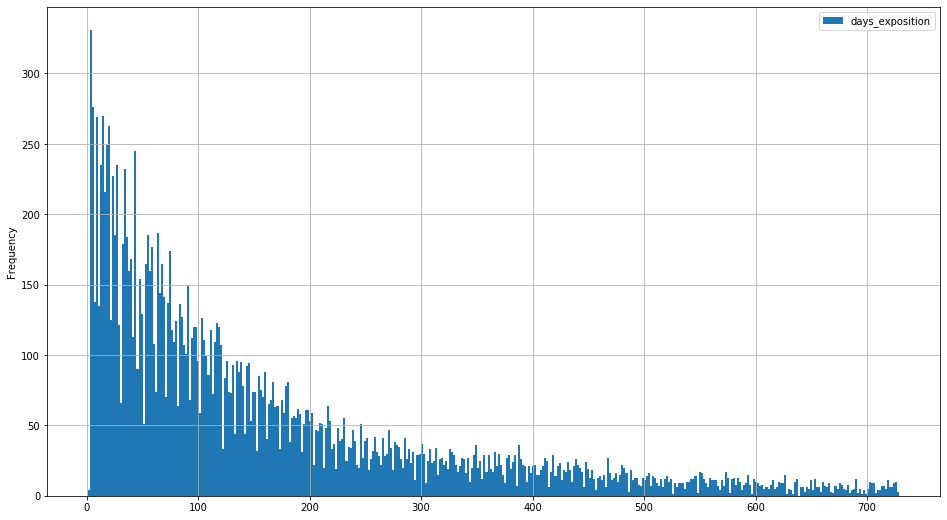

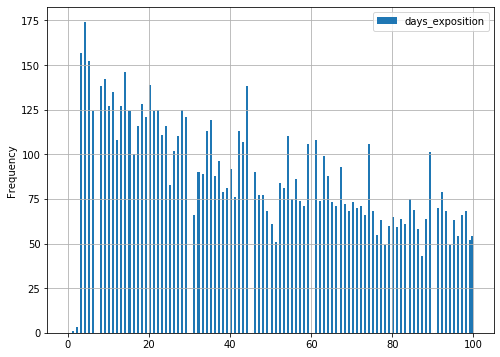

In [34]:
good_realty.plot(y='days_exposition', kind='hist', bins=400, grid=True, figsize=(16, 9))
good_realty.plot(y='days_exposition', kind='hist', bins=200, grid=True, range=(0, 100), figsize=(8, 6))

In [35]:
(realty['days_exposition'].count() - good_realty['days_exposition'].count()) / realty['days_exposition'].count()

0.13776360961255518

<div class="alert alert-info" role="alert">
13.8% данных потеряно
</div>

In [36]:
good_realty['price_per_meter'].corr(good_realty['total_area'])

0.296228017347031

In [37]:
def plot_constrctor(index):
    (good_realty.pivot_table(index=index, values='price_per_meter',
                             aggfunc=['median']).plot(grid=True))


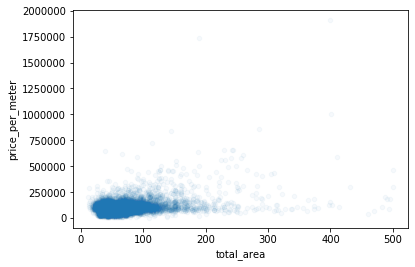

In [38]:
good_realty.plot(kind = 'scatter', y = 'price_per_meter', x = 'total_area', alpha = 0.04)

Прямой зависимости между общей площадью и ценой за метр нет.

In [39]:
good_realty['price_per_meter'].corr(good_realty['rooms'])

0.044031614303159945

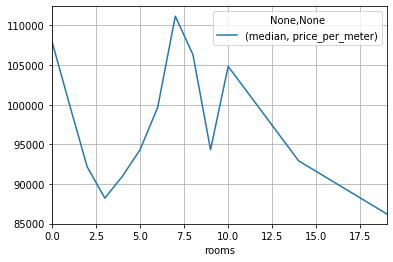

In [40]:
plot_constrctor(good_realty['rooms'])

Прямой корреляции нет, но по графику можно заметить что, квадратный метр дешевле в трех комнатных квартирах.

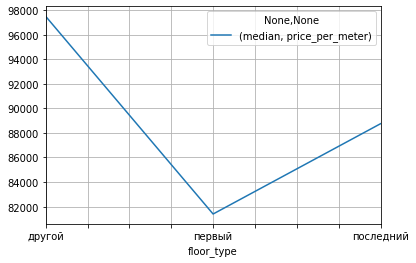

In [41]:
plot_constrctor(good_realty['floor_type'])

Квартиры на первом этаже самые дешевые.

In [42]:
good_realty['price_per_meter'].corr(good_realty['cityCenters_nearest'])

-0.3159323363896825

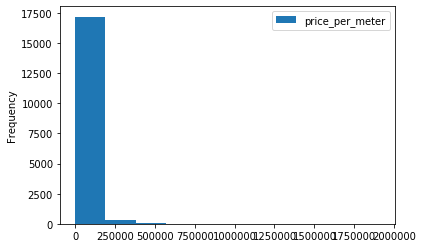

In [43]:
good_realty.plot(kind = 'hist', y = 'price_per_meter', x = 'cityCenters_nearest')


В центре квартиры намного дороже.

In [44]:
good_realty['price_per_meter'].corr(good_realty['weekday'])

-0.0031510029324702754

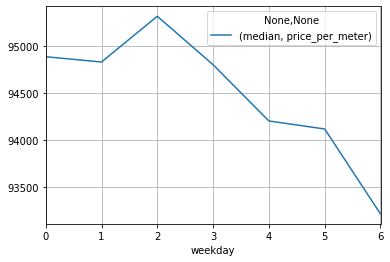

In [45]:
plot_constrctor(good_realty['weekday'])

К воскресенью цены снижаются, а в среду наоборот растут.

In [46]:
good_realty['price_per_meter'].corr(good_realty['month'])

-0.005421970874801046

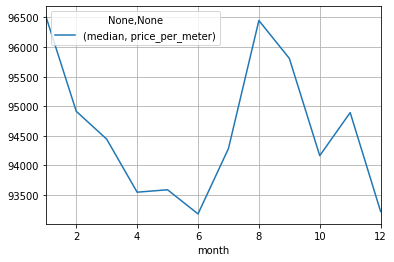

In [47]:
plot_constrctor(good_realty['month'])

В июне и декабре самые низкие цены. Январь и август самые не выгодные месяцы для покупки квартиры.

In [48]:
good_realty['price_per_meter'].corr(good_realty['year'])

0.012843015407447094

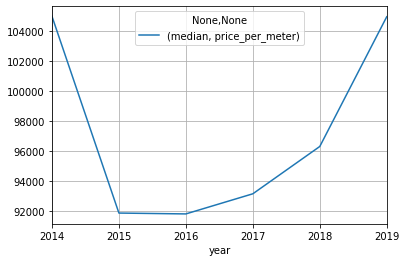

In [49]:
plot_constrctor(good_realty['year'])

In [50]:
good_realty['year'].value_counts()

2017    7158
2018    6457
2016    2293
2019     928
2015     701
2014      44
Name: year, dtype: int64

В 2014 году объявлений совсем мало, выборка не валидна.


In [51]:
good_realty_ten = good_realty.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count'])
good_realty_ten.columns = ['mean', 'count']
good_realty_ten = good_realty_ten.sort_values('count', ascending=False).head(10)
good_realty_ten

,mean,count
locality_name,,
Санкт-Петербург,112302.387664,11835
поселок Мурино,86251.395010,481
поселок Шушары,78373.504323,347
Всеволожск,69094.491468,293
Пушкин,103131.335821,268
Колпино,75380.018727,267
поселок Парголово,90054.291339,254
деревня Кудрово,92892.752033,246
Гатчина,67668.524229,227


In [52]:
good_realty_ten.query('mean == mean.max()')

,mean,count
locality_name,,
Санкт-Петербург,112302.387664,11835


In [53]:
good_realty_ten.query('mean == mean.min()')

,mean,count
locality_name,,
Выборг,57213.964706,170


Сделал таблицу из 10 самых популярных населенных пунктов. Самый дорогой Санкт-Петербург, а самый дешевый из выбранных Выборг.

,price_per_meter
to_center_in_km,
0,173519.481481
1,163017.325581
2,151691.859756
3,138404.902857
4,138114.192708
5,146067.794872
6,156486.409639
7,169010.720930
8,129391.477273


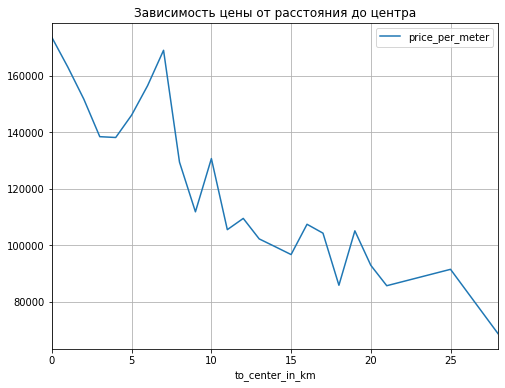

In [54]:
good_realty_spb = good_realty.query('locality_name == "Санкт-Петербург"').dropna()
good_realty_spb['to_center_in_km'] = (good_realty_spb['cityCenters_nearest']/ 1000).astype(int)
good_realty_spb_pivot = good_realty_spb.pivot_table(index='to_center_in_km', values='price_per_meter')   
good_realty_spb_pivot.plot(grid=True, figsize=(8, 6), title='Зависимость цены от расстояния до центра')
good_realty_spb_pivot

Сделал таблицу по Санкт-Петербургу, расстояние до цента, округлил до километров. На расстоянии в 3км от центра есть сильная просадка в цене. Дальше следует подъем в цене, и на расстоянии в 8 км. от центра, цены падают еще сильнее, будем считать это центром.

In [55]:
center_spb = good_realty_spb.query('to_center_in_km < 8')
center_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,living_area_and_total,kitchen_area_and_total,floor_type,to_center_in_km
3,0,64900000,159,2015-07-24,3,2.65,14,45,9,False,...,234.0,424.0,408176,4,7,2015,0.283019,0.056604,другой,6
24,8,6500000,97,2015-10-31,2,2.65,3,46,1,False,...,124.0,265.0,67010,5,10,2015,0.474227,0.195876,первый,2
63,2,20000000,118,2018-09-11,3,3.00,9,68,7,False,...,779.0,37.0,169491,1,9,2018,0.576271,0.135593,другой,4
136,16,6500000,51,2018-08-01,2,3.45,6,25,2,False,...,812.0,163.0,127450,2,8,2018,0.490196,0.137255,другой,3
137,11,13310800,85,2018-01-01,2,2.70,10,31,5,False,...,133.0,340.0,156597,0,1,2018,0.364706,0.305882,другой,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000,38,2018-06-23,1,2.55,16,17,15,False,...,230.0,113.0,131578,5,6,2018,0.447368,0.236842,другой,7
23644,7,4990000,62,2018-04-26,2,2.70,4,32,4,False,...,171.0,166.0,80483,3,4,2018,0.516129,0.193548,последний,4
23648,14,10100000,78,2017-05-12,3,3.27,5,48,5,False,...,117.0,621.0,129487,4,5,2017,0.615385,0.102564,последний,1
23665,11,4250000,47,2016-05-20,1,2.65,6,18,1,False,...,519.0,131.0,90425,4,5,2016,0.382979,0.297872,первый,4


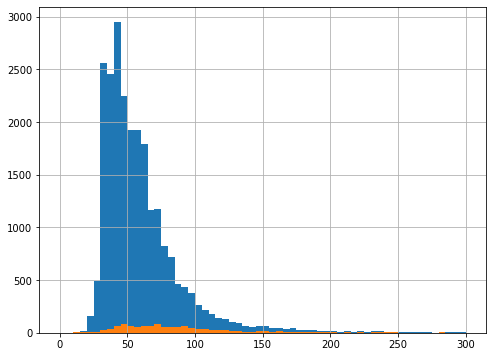

In [56]:
realty['total_area'].hist(bins=60, range=(0, 300), figsize=(8, 6))
center_spb['total_area'].hist(bins=60, range=(0, 300), figsize=(8, 6))

Распределение площади в центре очень схоже с распределением по остальной выборки.

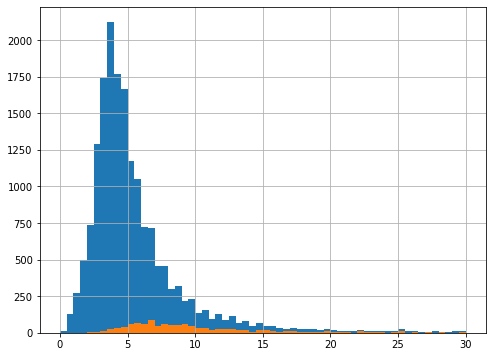

In [57]:
(good_realty['last_price'] / 1000000).hist(bins=60, range=(0, 30), figsize=(8, 6))
(center_spb['last_price'] / 1000000).hist(bins=60, range=(0, 30), figsize=(8, 6))

В центре смещение к более дорогим квартирам.

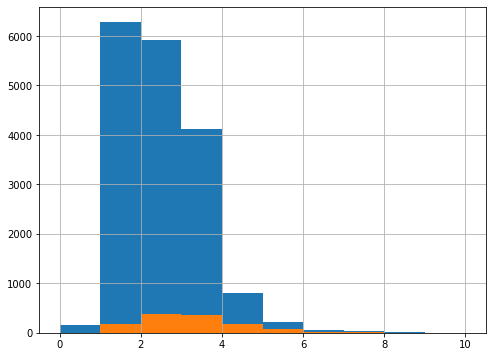

In [58]:
good_realty['rooms'].hist(bins=10, range=(0, 10), figsize=(8, 6))
center_spb['rooms'].hist(bins=10, range=(0, 10), figsize=(8, 6))

В центре больше многокомнатных квартир.

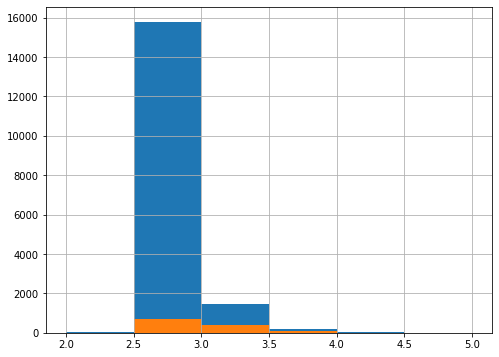

In [59]:
good_realty['ceiling_height'].hist(bins=6, range=(2, 5), figsize=(8, 6))
center_spb['ceiling_height'].hist(bins=6, range=(2, 5), figsize=(8, 6))

В центре потолки выше, чем на окраинах.

In [60]:
def plot_constrctor_center(index):
    (center_spb.pivot_table(index=index, values='price_per_meter',
                             aggfunc=['median']).plot(grid=True))

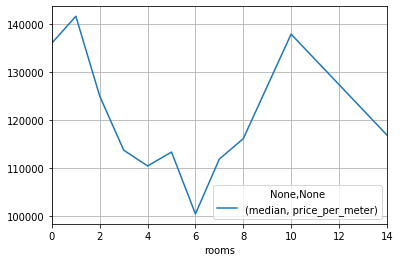

In [61]:
plot_constrctor_center(good_realty['rooms'])

В центре однокомнатные квартиры стоят существенно дороже, чем в остальной части Питера.

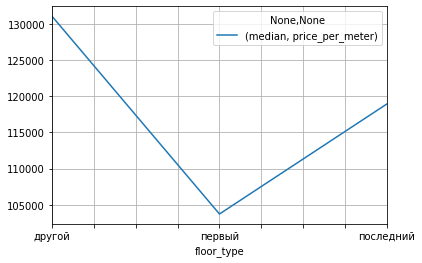

In [62]:
plot_constrctor_center(good_realty['floor_type'])

Картина не отличается от остального города, самые дешевые квартиры на первом этаже.

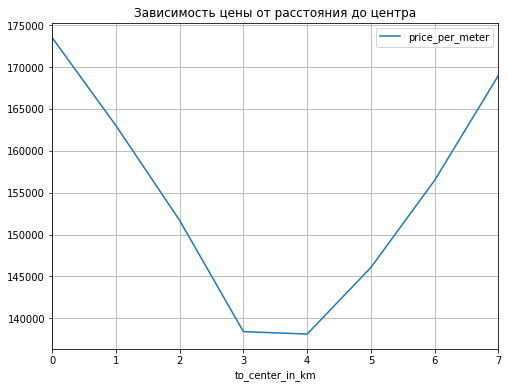

In [63]:
center_pivot = center_spb.pivot_table(index='to_center_in_km', values='price_per_meter')   
center_pivot.plot(grid=True, figsize=(8, 6), title='Зависимость цены от расстояния до центра')

Цены снижаются по мере удаления от центара.

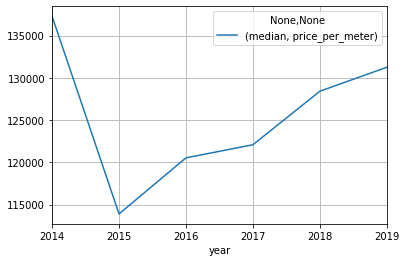

In [64]:
plot_constrctor_center(good_realty['year'])

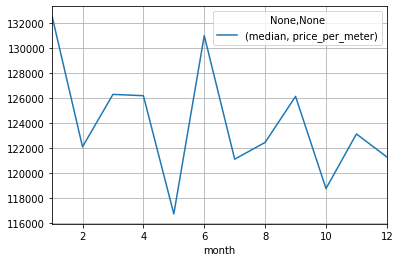

In [65]:
plot_constrctor_center(good_realty['month'])

В центре картина по месяцам сильно отличается от остального города, май самый выгодный месяц для покупки квартиры в центре.

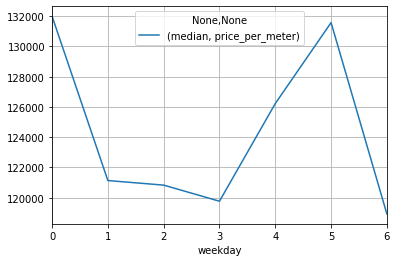

In [66]:
plot_constrctor_center(good_realty['weekday'])

Так же как и в остальной части города в воскресенье самые выгодные цены.

### Шаг 5. Общий вывод

##### Факторы влияющие на цену квартир.
- Больше половины квартир продается по цене до 5 млн. рублей.
- На цену м² существенное влияние оказывает общая площадь квартиры, в квартирах до 100 м² корреляция составляет 0.24, в квартирах большей площадью влияние увеличивается до 0.39.
- м² в трехкомнатных квартирах на 6.73% цены дешевле чем в остальной выборке.
- Этаж тоже оказывает влияние на стоимость квартиры. Самые дешевые квартиры на первом этаже, затем идут квартиры на последнем этаже, а квартиры между ними оказались самыми дорогими. В среднем квартиры на первом этаже дешевле на 13.95% чем цены  в общем на рынке.
- Удаленность квартиры от центра существенно влияет на ее стоимость, и является одним из основных факторов влияющих на конечную цену, корреляция составляет -0.31.
- Также наблюдается сезонность, весной - летом цены дешевле, чем осенью - зимой. И в конце недели цены ниже чем среди недели.

##### Типичные параметры продающихся квартир.
- В основном продаются квартиры площадью 40 - 69 м².
- Типичная цена продажи 3.4 - 6.79 млн. рублей.
- Комнаты от 1 до 3.
- Высота потолков 2.6 - 2.7 м.
- Время продажи составляет от 43 до 229 дней.

##### Для центра параметры отличаются.
Центральная часть города судя по графику цен, имеет диаметр примерно 16 км.
- В центре площадь квартир больше и в основном составляет 55 - 106 м².
- Цена от 6.45 до 14.5 млн. рублей.
- Количество комнат в центре тоже более, здесь однокомнатных практически нет, и продаются в основном двух и трех комнатные.
- Потолки 2.65 - 3.2 м.
- Время продажи 61 - 299 дней.